#### 
# Predicting ST depression induced by exercise in Heart disease data
***
## Phase 2: Statistical Modelling

#### 
## Table of Contents
***
* [Introduction](#Introduction)
  + [Phase 1 Summary](#Phase-1-Summary)
  + [Report Overview](#Report-Overview)
  + [Overview of Methodology](#Overview-of-Methodology)
* [Statistical Modelling](#Statistical-Modelling)
  + [Model Overview](#Model-Overview)
  + [Model Fitting](#Model-Fitting)
* [Critique & Limitations](#Critique-&-Limitations)
* [Summary & Conclusions](#Summary-&-Conclusions)
  + [Project Summary](#Project-Summary)
  + [Summary of Findings](#Summary-of-Findings)
  + [Conclusions](#Conclusions)

#### 
## Introduction <a id='Introduction'></a>
***

### Phase 1 Summary <a id='Phase-1-Summary'></a>

Throughout work conducted in the Phase 1 of this regression model, several data visualizations were created to allow to get some insight about which features would be valuable for inclusion in a machine learning model. An approach to quantify some degree of accuracy and understand the dataset, data features were examinated versus the target feature, measuring the discrepancy between the “disease” and “no-disease” distributions for each attribute. 

An statement extracted from the data visualizations was to claim that males are more prone to suffer of heart disease, and the histograms showed with various degrees that people with heart disease tend to be older, have higher blood pressure, higher cholesterol levels, a lower maximum heart rate under the Thalium stress test than people without the disease, as well as a high correlation between hight values of ST segment depression occurring during the active phase of exercise test.

These results allowed us to get some insight about which features would be valuable for inclusion in a machine learning model, or to answer the question of which test one should choose if one had the resources to perform only one. Our current target feature evaluated the possible outcomes of heart disease given as a binary outcome, for which a logistic regression model would create more accurate predictions. 

Given that we are currently focusing on a multiple linear regression model study, we will be choosing `oldpeak` as our new target variable. For the purpose of clarification, a table of the variables contained within the used dataset and their respective descriptions is included below. 


| Name | Description |
|:------|:------|
| age  | Age of the patient |
| sex  |  Sex of the patient | 
| cp   |  Chest pain type: 0 - Typical Angina, 1 - Atypical Angina, 2 - Non-Anginal Pain, 3 - Asymptomatic | 
| trtbps  |  Resting blood pressure | 
| chol    |  Serum cholesterol | 
| fbs    |  Fasting blood sugar > 120 mg/dl: 1 - True, 0 - False | 
| restecg  |  Resting electrocardiography results: 0 - Normal, 1 - Having ST-T wave abnormality, 2 - Left ventricular hypertrophy | 
| thalachh  | Maximum heart rate achieved |
| exng  | Exercise-induced angina: 1 - Yes, 0 - No |
| oldpeak   | ST depression induced by exercise relative to rest |
| slp  | The slope of the peak exercise ST segment: 0 - Upsloping, 1 - Flat, 2 - Downsloping |
| caa  | Number of major vessels colored by fluoroscopy |
| thall  | Thalassemia stress result: 1 - Fixed defect (no blood flow in some part of the heart), 2 - Normal blood flow, 3 - Reversible defect (abnormal blood flow) |
| output   | Heart disease: 1 - Yes, 0 - No |

### Report Overview <a id='Report-Overview'></a>

Exercise induced ST segment depression (`oldpeak`) is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis. It has also been associated with a worse prognosis for patients with a documented coronary artery disease. Given that our data exploration conducted in Phase 1 showed strong correlation between heart failure and high values of ST segment depression occurring during the active phase of exercise, we will be creating a multiple linear regression model to predict such values in an attempt to prevent heart disease.

The project requires the performance and explanation of a simple linear regression, using Python, on this dataset. The goal is to predict the output based on the all the varaibles accurately. But to be sure that we have the optimal number of features, you have to follow some dimensionality reduction techniques like lasso reduction (shrinking large regression coefficients in order to reduce overfitting), Principal Component Analysis (PCA) or Backward Feature selection. In our scenrio we are selecting the backward feature selection.

### Overview of Methodology <a id='Overview-of-Methodology'></a>

The summary table below shows the results of a regression model for predicting the ST depression induced by exercise relative to rest (`oldpeak`) based on some of the variables included in the dataset. More specifically, a summary of our final "Reduced Statistical Model" section below.

| - | coef | std err   | t value | P(>abs(t)) |
|:------|:------|:------|:------|:------|
| (Intercept) | 1.7598    |  0.431   | 4.084     |  0.000 |
|   trtbps    | 0.0065    | 0.003    | 2.180     |  0.030 | 
|   slp       | -0.9022   | 0.090    | -10.029   |  0.000 | 
|   output    | -0.5837   | 0.111    | -5.236    |  0.000 | 

#### 
## Statistical Modelling <a id='Statistical-Modelling'></a>
***

### Model Overview <a id='Model-Overview'></a>

Overview of your full model, including the variables and terms you are using in your model.

#### Module Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group76.csv')

Below are five observations from this data set.

In [2]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Plot pairwise relationships among oldpeak, thalachh, chol and trtbps

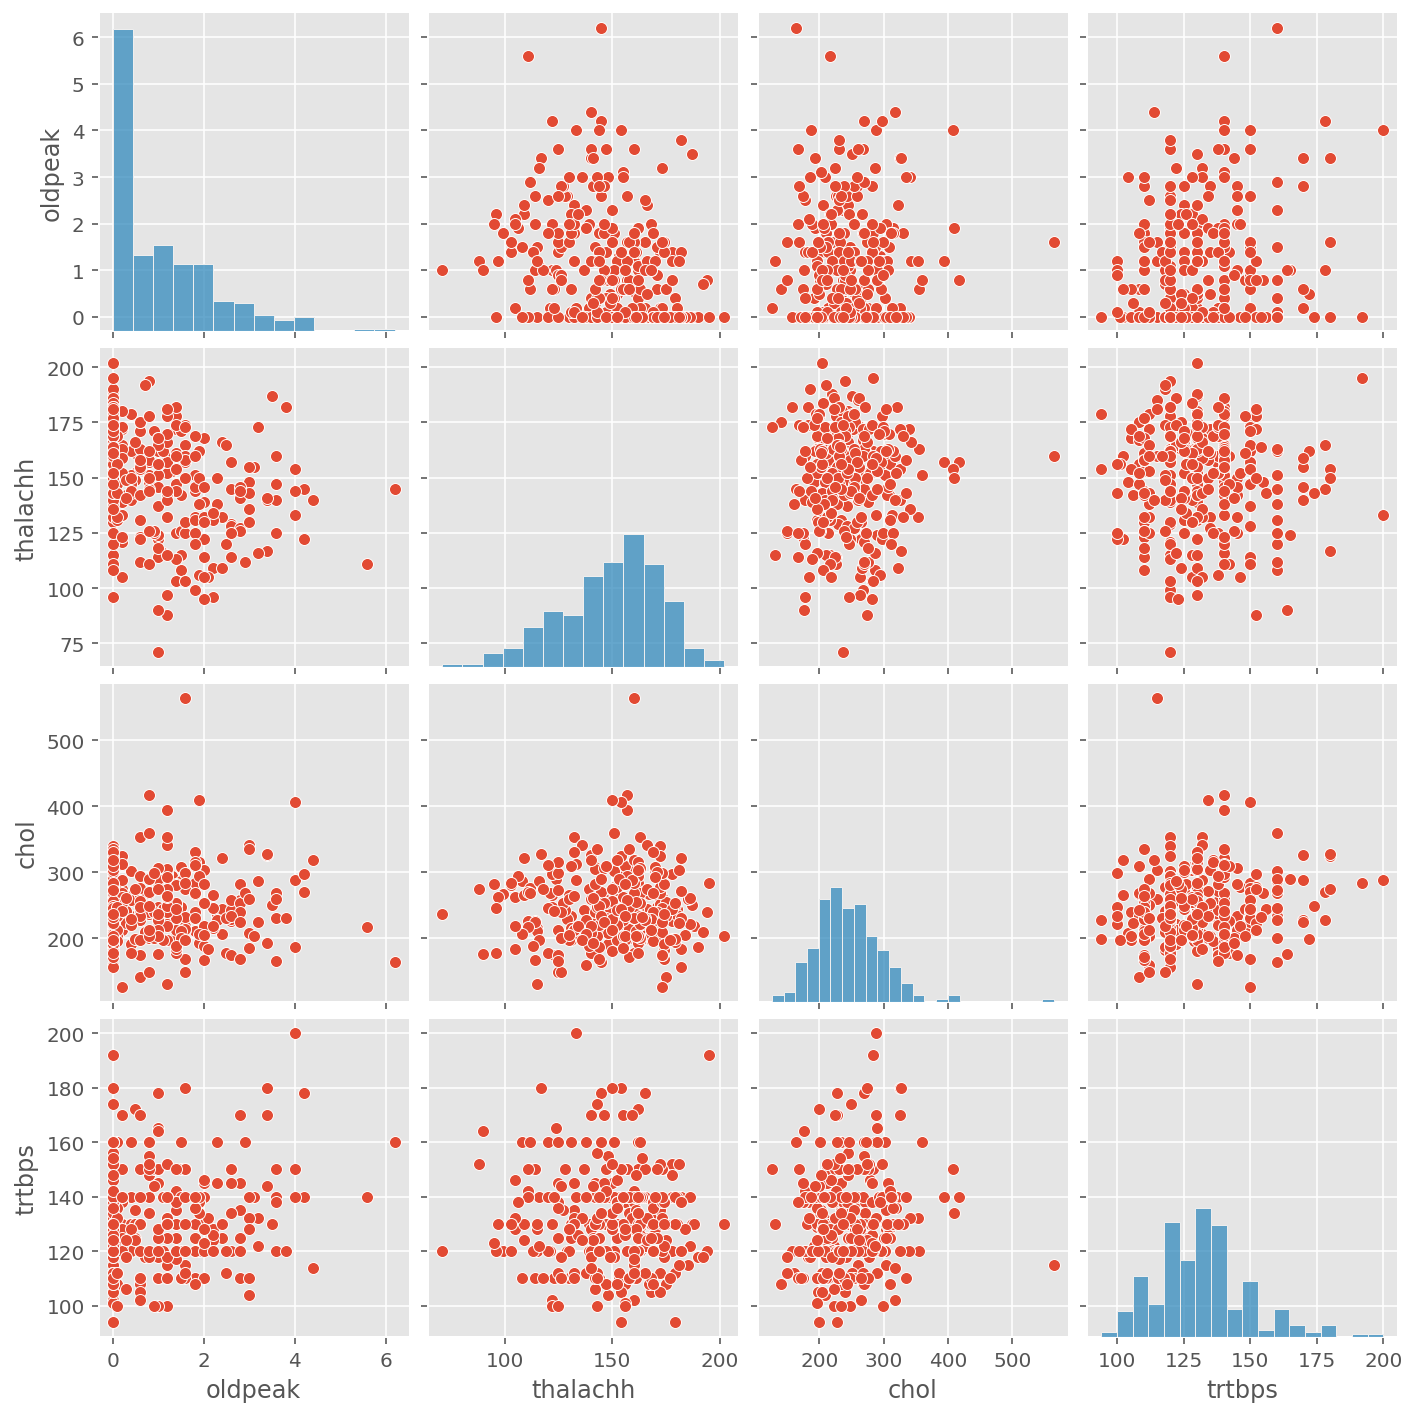

In [3]:
sns.pairplot(df, vars = ['oldpeak', 'thalachh', 'chol', 'trtbps'])
plt.show()

### Model Fitting <a id='Model-Fitting'></a>

#### Full Model Overview

First, let's fit a multiple linear regression model for `oldpeak` as the response (dependent) variable, evaluating the relationship between the predictor variable and the outcome while controlling for the potential influence of other variables.

The model can be written as:

$$ \hat{\text{oldpeak}} = {\beta}_{0} +{\beta}_{1}\text{age} +{\beta}_{2}\text{sex} +{\beta}_{3}\text{cp} +{\beta}_{4}\text{trtbps} +{\beta}_{5}\text{chol} +{\beta}_{6}\text{fbs} +{\beta}_{7}\text{restecg} +{\beta}_{8}\text{thalachh} +{\beta}_{9}\text{exng} +{\beta}_{10}\text{slp} +{\beta}_{11}\text{caa} +{\beta}_{12}\text{thall} +{\beta}_{13}\text{output} $$
#### 
Where oldpeak represents the ST depression induced by exercise relative to rest. Notice there is an intercept, beta zero, and each variable has its own regression parameter.

In [4]:
# Regression Formula
formula_string_independent_variable = ' + '.join(df.drop(columns='oldpeak').columns)
formula_string = 'oldpeak ~ ' + formula_string_independent_variable
print('formula_string: ', formula_string)

formula_string:  oldpeak ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + exng + slp + caa + thall + output


In [5]:
# Initialising the model
model_full = sm.formula.ols(formula=formula_string, data=df)

# Fit our model
model_full_fitted = model_full.fit()

# Observe the summary
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                oldpeak   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     16.55
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.42e-28
Time:                        23:59:25   Log-Likelihood:                -390.37
No. Observations:                 303   AIC:                             808.7
Df Residuals:                     289   BIC:                             860.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1884      0.750      1.584      0.1

We compute R-squared and Adjusted R-squared values again to make sure the match our OLS Regression results

In [6]:
print(f'The R squared value is {model_full_fitted.rsquared:.3f}')
print(f'The adjusted R squared value is {model_full_fitted.rsquared_adj:.3f}')

The R squared value is 0.427
The adjusted R squared value is 0.401


The full model has an adjusted R-squared value of 0.427, which means that around 42% of the variance is explained by the model.

We calculate the estimate and residual for the first observation of the dataset.

$$ \hat{\text{oldpeak}} = 1.884 +0.0033\text{age} +0.0449\text{sex} +0.0534\text{cp} +0.0064\text{trtbps} +0.0003\text{chol} -0.2054\text{fbs} +0.0692\text{restecg} -0.0022\text{thalachh} +0.1615\text{exng} -0.8834\text{slp} +0.1066\text{caa} +0.1255\text{thall} -0.3784\text{output} $$

In [7]:
estimate = 1.884 + 0.0033*63 + 0.0449*1 + 0.0534*3 + 0.0064*145 + 0.0003*233 - 0.2054*1 + 0.0692*0 - 0.0022*150 + 0.1615*0 - 0.8834*0 + 0.1066*0 + 0.1255*1 - 0.3784*1
print(f'The predicted oldpeak for the first observation is {estimate:.3f}')

residual = abs(2.3 - estimate)
print(f'The residual is {residual:.3f}')

The predicted oldpeak for the first observation is 2.507
The residual is 0.207


Below we define a new data frame for actual `oldpeak` vs. predicted `oldpeak` again, but this time including all the observations of the dataset.

In [8]:
residuals_full = pd.DataFrame({'actual': df['oldpeak'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,2.3,1.828857,0.471143
1,3.5,1.917187,1.582813
2,1.4,0.013144,1.386856
3,0.8,0.111136,0.688864
4,0.6,0.251452,0.348548
5,0.4,0.997763,-0.597763
6,1.3,1.083750,0.216250
7,0.0,0.216822,-0.216822
8,0.5,0.427161,0.072839
9,1.6,0.345588,1.254412


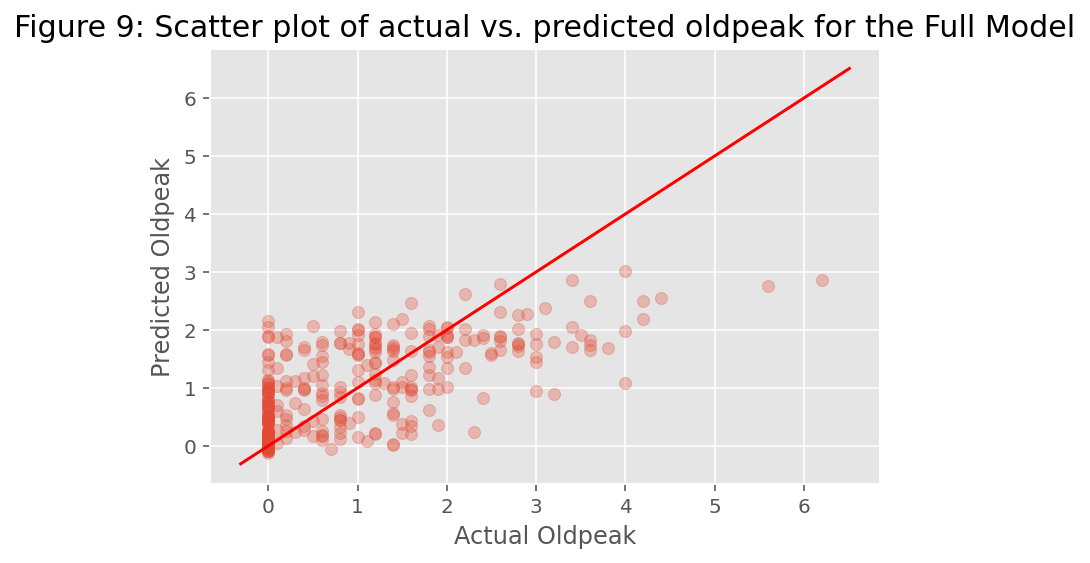

In [9]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Oldpeak');
plt.ylabel('Predicted Oldpeak');
plt.title('Figure 9: Scatter plot of actual vs. predicted oldpeak for the Full Model', fontsize=15);
plt.show();

#### Full Model Diagnostic Checks

We will be using the data frame constructed above to run the Full Model Diagnostic Checks.

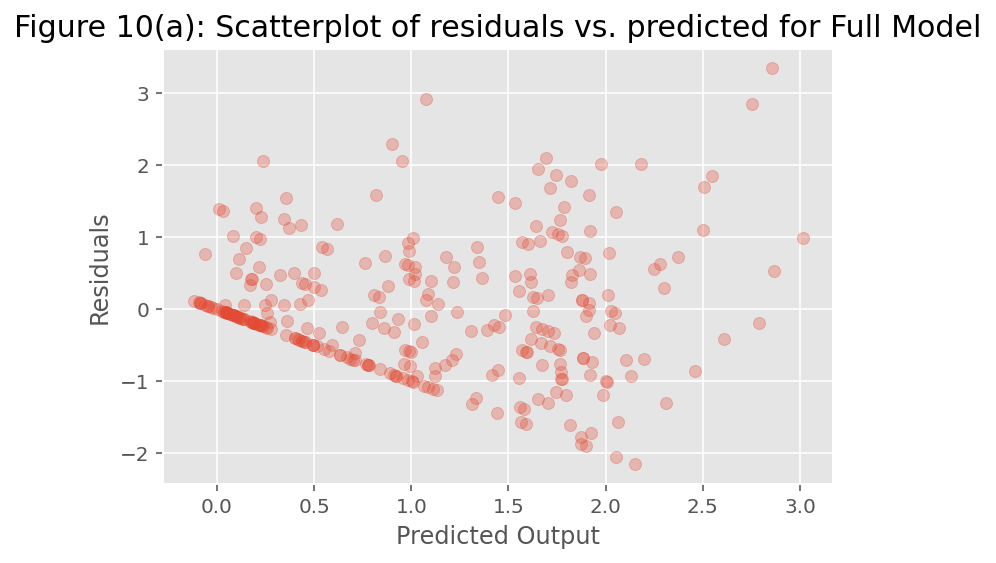

In [10]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Output');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted for Full Model', fontsize=15)
plt.show();

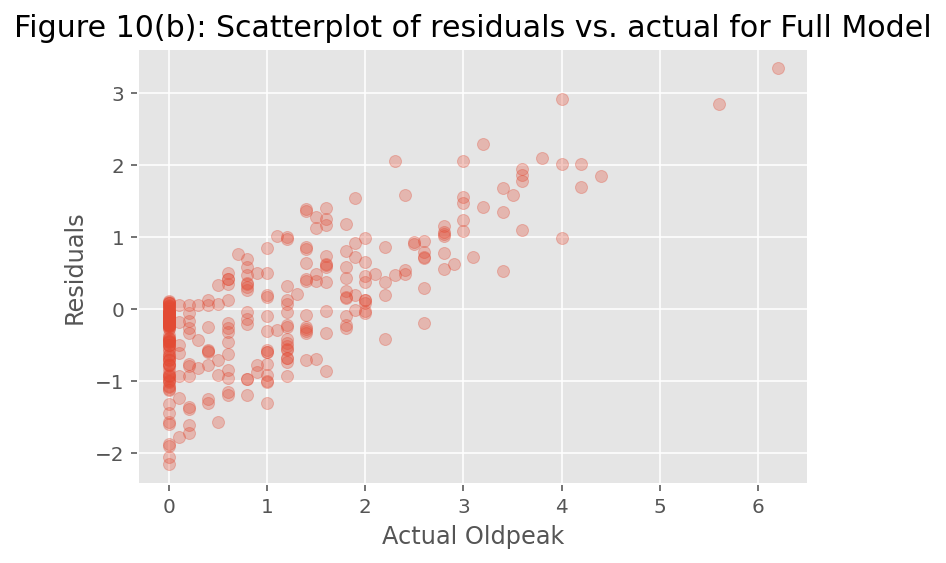

In [11]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Oldpeak');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual for Full Model', fontsize=15)
plt.show();

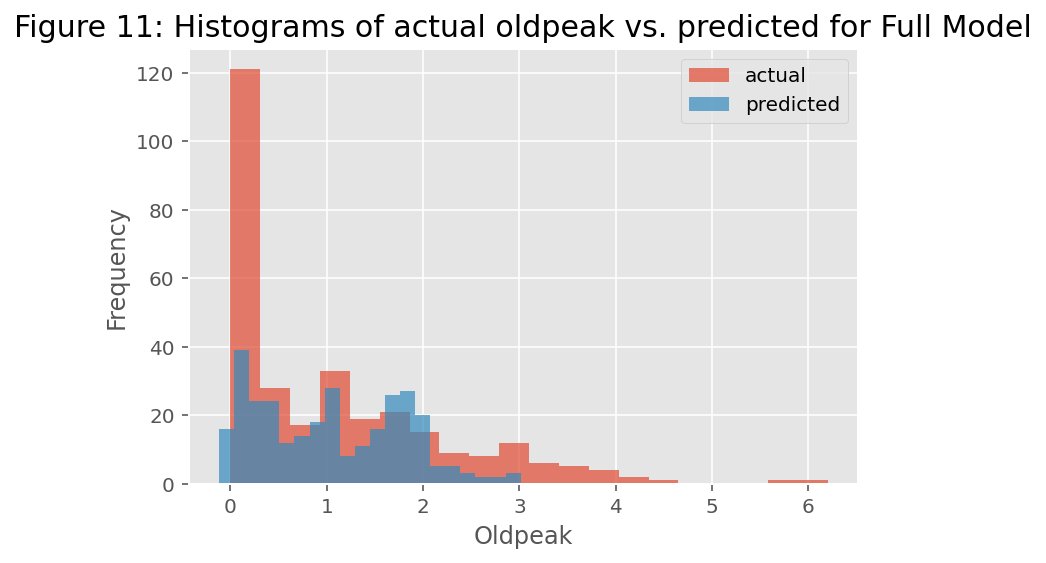

In [12]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Oldpeak');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual oldpeak vs. predicted for Full Model', fontsize=15);
plt.legend()
plt.show();

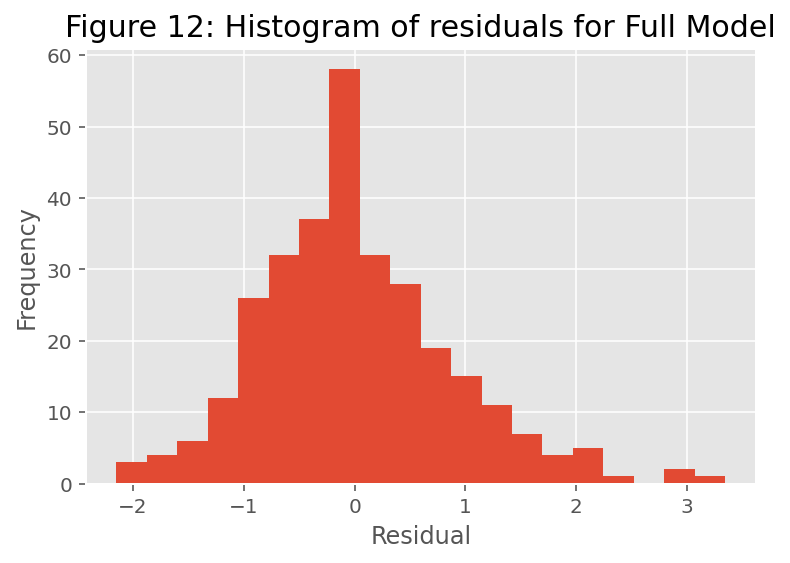

In [13]:

plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of residuals for Full Model', fontsize=15);
plt.show();

In figure 12 there is a fairly symmetric histogram around zero, which suggests that the residuals are normally distributed.

#### Reduced Model Overview

#### Backwards Feature Selection
The Backward-elimination strategy starts with the model that includes all potential predictor variables. Given variables are eliminated one-at-a-time from the model until only variables with statistically significant P-values remain.

The code used below performs the backward-elimination feature strategy using p-values. This code is taken from [this](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb) regression case study.

In [14]:
# Create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# Initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# Do backwards elimination using p-values with a cutoff value of 0.05
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:

    # In each step:
    # print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data = df).fit()
    
# Clean fit model after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df).fit()
    
    
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "chol" with p-value 0.7462

Removing term "sex" with p-value 0.764

Removing term "age" with p-value 0.607

Removing term "restecg" with p-value 0.551

Removing term "cp" with p-value 0.3405

Removing term "thalachh" with p-value 0.3627

Removing term "exng" with p-value 0.2083

Removing term "fbs" with p-value 0.2026

Removing term "thall" with p-value 0.1126

Removing term "caa" with p-value 0.06314

***
                            OLS Regression Results                            
Dep. Variable:                oldpeak   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     67.45
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           2.44e-33
Time:                        23:59:28   Log-Likelihood:                -396.38
No. Observations:                 303   AIC: 

In [15]:
residuals_reduced = pd.DataFrame({'actual': df['oldpeak'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,2.3,1.828857,0.471143
1,3.5,1.917187,1.582813
2,1.4,0.013144,1.386856
3,0.8,0.111136,0.688864
4,0.6,0.251452,0.348548
5,0.4,0.997763,-0.597763
6,1.3,1.083750,0.216250
7,0.0,0.216822,-0.216822
8,0.5,0.427161,0.072839
9,1.6,0.345588,1.254412


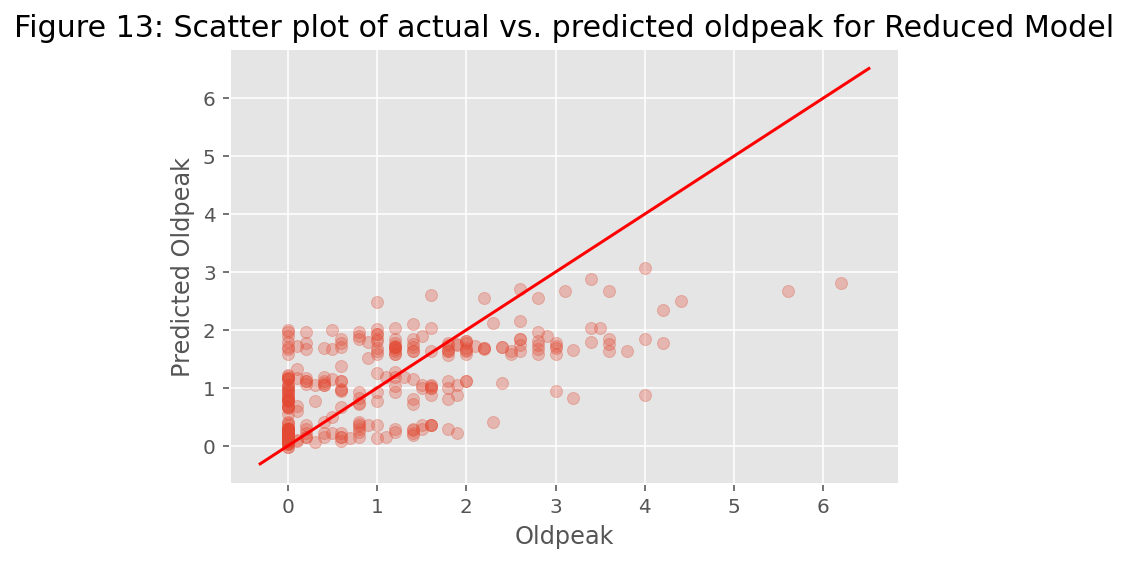

In [16]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Oldpeak');
plt.ylabel('Predicted Oldpeak');
plt.title('Figure 13: Scatter plot of actual vs. predicted oldpeak for Reduced Model', fontsize=15);
plt.show();

#### Reduced Model Diagnostic Checks

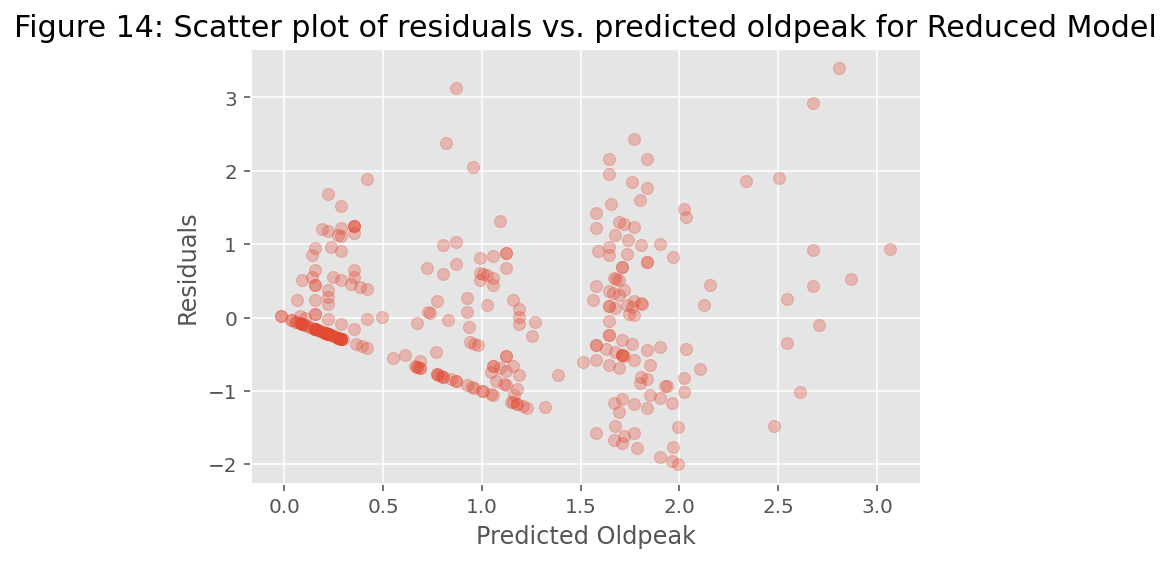

In [17]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Oldpeak');
plt.ylabel('Residuals')
plt.title('Figure 14: Scatter plot of residuals vs. predicted oldpeak for Reduced Model', fontsize=15)
plt.show();

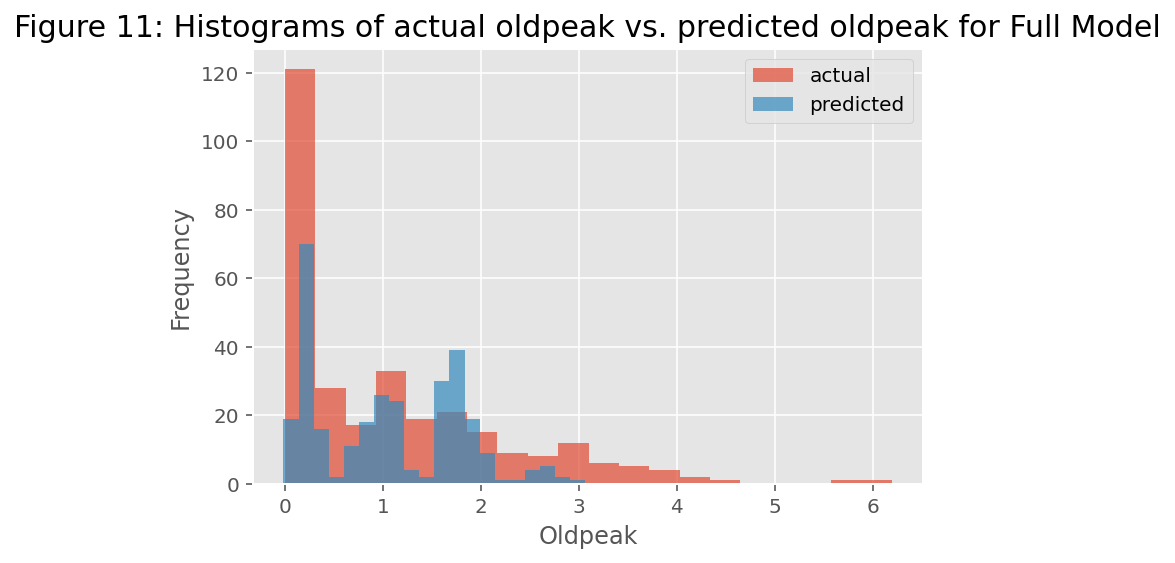

In [18]:
plt.hist(residuals_reduced['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_reduced['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Oldpeak');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual oldpeak vs. predicted oldpeak for Full Model', fontsize=15);
plt.legend()
plt.show();

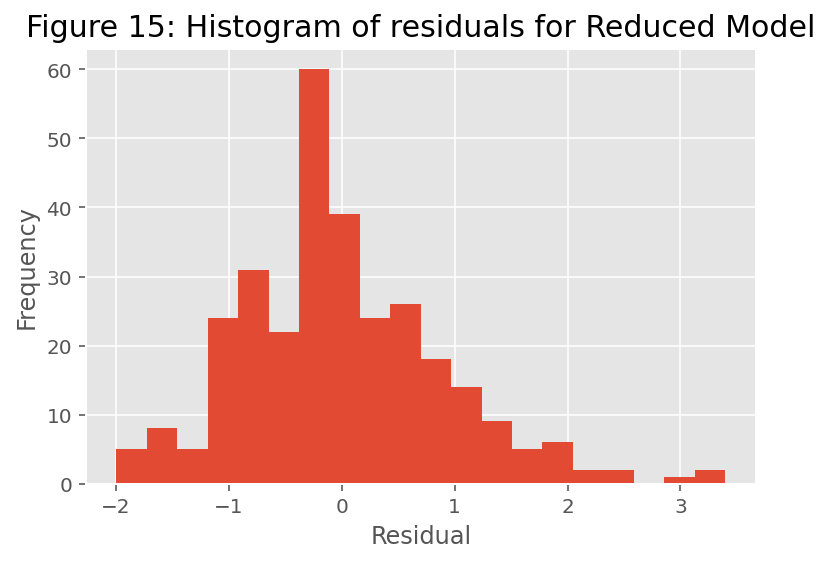

In [19]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

#### 
## Critique & Limitations <a id='Critique-&-Limitations'></a>
***

By its nature, linear regression only looks at linear relationships between dependent and independent variables. That is, it assumes there is a straight-line relationship between them. Sometimes this is incorrect. 
Within this specific study, we notice that in the reduced model, many of the variables excluded during the backward selection are the main variables correlated to our target feature. Although our main focus was that our network works well and selects the only features above the 0.05 threshold level, a full model including all features might be more accurate. 

#### 
## Summary & Conclusions <a id='Summary-&-Conclusions'></a>
***

### Project Summary <a id='Project-Summary'></a>

In the phase 1 of our project we proceeded by checking if the feature types match the description outlined in the documentation. After evaluating that the data was accurate we check and renamed some column names for readability and usability purposes, check for missing values/ duplicated values, and dropped irrelevant features in our dataset. As the data has less than 5000 rows, no random sampling was required. After the data cleaning and preprocessing steps were finalized, we began by analyzing our target feature with some data visualizations.

Throughout this phase of the regression model, several data visualizations were created to allow to get some insight about the dataset features. In an attempt to understand the dataset, data features were examinated versus the target feature, measuring the discrepancy between the “disease” and “no-disease” distributions for each attribute. 

Within the phase 2 of our project we constructed a multiple linear regression model with `oldpeak` selected as our dependent variable against all the rest of the features within our dataset. We fitted a full model with all variables within the dataset, and a reduced model that involved the backward elimination strategy. For both models we run some diagnostics to make sure our regression model followed the 4 assumptions of residuals being nearly normal, the variability of the residuals is nearly constant, the residuals are independent, and each variable is linearly related to the outcome.

### Summary of Findings <a id='Summary-of-Findings'></a>

After running the General OLS (Linear regresssion model), we moved on to selecting the p value. Generally a 5% significance level for P-value is perfect for normal circumstances. So keep the P-value = 0.05. Now, we devised a method to Proceed only if its P-value is more than the significance level selected e.g. 0.05. We only selcted the varaibles whose P-value of x1 is greater than significance level. Now we can see that all features have a P-value less than the significance level. Now we know that the optimal feature-set required for our algo is just feature sex, chol, fbs,and restecg. By comparing the results we can see, between feature-full and feature-reduced linear regression. However, this is dataset with very few features, so we don’t see much difference between the performance or accuracy of the predictions.

Multiple linear regression follow assumptions, to identify any irregularities within our residuals we run diagnostic checks. Residual scatter plots indicate that the residuals are independent. Given plots were useful in identifying any patterns between cases that are close to one another, since consecutive points did not appear to be related, we see no structure that would indicate a problem. 

Using our independent variables, we were able to get a reduced model with an Adjusted R-squared value of about 40%. After backwards variable selection with a p-value cutoff value of 0.05, we were able to maintain almost the same performance but with 10 less variables. Our final model has 3 variables all together with a model p-value of 0.

### Conclusions <a id='Conclusions'></a>

The final multiple linear regression model has an Adjusted R-squared value of about 40%, relatively low. It appears that the variables we used are not quite adequate for accurately predicting the ST depression induced by exercise in Heart disease data within a multiple linear regression framework.

#### 
## References <a id='References'></a>
***
  
- Rashik Rahman. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. This dataset can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


***